In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
df = pd.read_csv('Sim_data_1.csv')

In [3]:
df.head()

,# Time (s),Altitude (m),Vertical velocity (m/s),Vertical acceleration (m/s²),Total velocity (m/s),Total acceleration (m/s²),Position East of launch (m),Position North of launch (m),Lateral distance (m),Lateral direction (°),...,Reference length (in),Reference area (cm²),Vertical orientation (zenith) (°),Lateral orientation (azimuth) (°),Wind velocity (m/s),Air temperature (°C),Air pressure (mbar),Speed of sound (m/s),Simulation time step (s),Computation time (s)
0,0.00,0.000000,0.000000,-4.0561,0.000000,4.0785,0.000000,0.0,0.000000,0.0,...,6.155,191.96,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.000938
1,0.01,0.000000,0.000000,7.2084,0.000000,7.2482,0.000000,0.0,0.000000,0.0,...,6.155,191.96,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.001243
2,0.02,0.000361,0.072111,18.4780,0.072508,18.5800,0.000038,0.0,0.000038,0.0,...,6.155,191.96,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.001548
3,0.03,0.002006,0.256940,24.6270,0.258350,24.7630,0.000211,0.0,0.000211,0.0,...,6.155,191.96,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.001975
4,0.04,0.005807,0.503270,25.2030,0.506050,25.3420,0.000610,0.0,0.000610,0.0,...,6.155,191.96,84.0,0.0,NaN,14.675,1007.4,340.19,0.01,0.002181


In [4]:
df.columns

Index(['# Time (s)', 'Altitude (m)', 'Vertical velocity (m/s)',
       'Vertical acceleration (m/s²)', 'Total velocity (m/s)',
       'Total acceleration (m/s²)', 'Position East of launch (m)',
       'Position North of launch (m)', 'Lateral distance (m)',
       'Lateral direction (°)', 'Lateral velocity (m/s)',
       'Lateral acceleration (m/s²)', 'Latitude (°)', 'Longitude (°)',
       'Gravitational acceleration (m/s²)', 'Angle of attack (°)',
       'Roll rate (r/s)', 'Pitch rate (r/s)', 'Yaw rate (r/s)', 'Mass (g)',
       'Propellant mass (g)', 'Longitudinal moment of inertia (kg·m²)',
       'Rotational moment of inertia (kg·m²)', 'CP location (in)',
       'CG location (in)', 'Stability margin calibers (​)', 'Mach number (​)',
       'Reynolds number (​)', 'Thrust (N)', 'Drag force (N)',
       'Drag coefficient (​)', 'Axial drag coefficient (​)',
       'Friction drag coefficient (​)', 'Pressure drag coefficient (​)',
       'Base drag coefficient (​)', 'Normal force coeffic

In [5]:
df.columns = ['t', 'Altitude', 'VertVel', 'VertAccel', 'TotalVel', 'TotalAccel', 'PosEast','PosNorth', 'LateralDist','LateralDirection', 'LateralVel','LateralAccel','Latitude','Longitude','g','alpha','RollRate','PitchRate','YawRate','Mass','PropMass','LongInertia','RotInertia','CP_loc','CG_log','StaticMargin','Mach','Re','Thrust','Drag','CD','CD_axial','CD_friction','CD_pressure','CD_base','CN','CM','CY','CS','CR','C_roll_forcing','C_roll_damping','C_pitch_damping','coriolis_accel','Ref_length','Ref_area','VertOrientation','LateralOrientiation','WindSpeed','AirTemp','AirPressure','Speed_of_sound','SimTimeStep','CompTime']

In [6]:
df.columns

Index(['t', 'Altitude', 'VertVel', 'VertAccel', 'TotalVel', 'TotalAccel',
       'PosEast', 'PosNorth', 'LateralDist', 'LateralDirection', 'LateralVel',
       'LateralAccel', 'Latitude', 'Longitude', 'g', 'alpha', 'RollRate',
       'PitchRate', 'YawRate', 'Mass', 'PropMass', 'LongInertia', 'RotInertia',
       'CP_loc', 'CG_log', 'StaticMargin', 'Mach', 'Re', 'Thrust', 'Drag',
       'CD', 'CD_axial', 'CD_friction', 'CD_pressure', 'CD_base', 'CN', 'CM',
       'CY', 'CS', 'CR', 'C_roll_forcing', 'C_roll_damping', 'C_pitch_damping',
       'coriolis_accel', 'Ref_length', 'Ref_area', 'VertOrientation',
       'LateralOrientiation', 'WindSpeed', 'AirTemp', 'AirPressure',
       'Speed_of_sound', 'SimTimeStep', 'CompTime'],
      dtype='object')

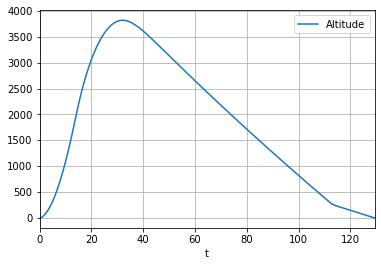

In [7]:
df.plot(x='t', y='Altitude')
plt.grid()

In [8]:
#get apogee time
apogee_ind = df['Altitude'].idxmax()
print('Apogee Time: ',df['t'][apogee_ind], 's')

Apogee Time:  31.971999999999998 s


In [9]:
df2 = df.iloc[:apogee_ind]

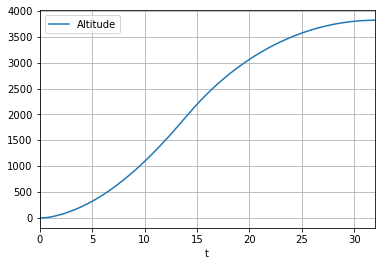

In [10]:
df2.plot(x='t', y='Altitude')
plt.grid()

In [11]:
df2.columns

Index(['t', 'Altitude', 'VertVel', 'VertAccel', 'TotalVel', 'TotalAccel',
       'PosEast', 'PosNorth', 'LateralDist', 'LateralDirection', 'LateralVel',
       'LateralAccel', 'Latitude', 'Longitude', 'g', 'alpha', 'RollRate',
       'PitchRate', 'YawRate', 'Mass', 'PropMass', 'LongInertia', 'RotInertia',
       'CP_loc', 'CG_log', 'StaticMargin', 'Mach', 'Re', 'Thrust', 'Drag',
       'CD', 'CD_axial', 'CD_friction', 'CD_pressure', 'CD_base', 'CN', 'CM',
       'CY', 'CS', 'CR', 'C_roll_forcing', 'C_roll_damping', 'C_pitch_damping',
       'coriolis_accel', 'Ref_length', 'Ref_area', 'VertOrientation',
       'LateralOrientiation', 'WindSpeed', 'AirTemp', 'AirPressure',
       'Speed_of_sound', 'SimTimeStep', 'CompTime'],
      dtype='object')

In [12]:
df2

,t,Altitude,VertVel,VertAccel,TotalVel,TotalAccel,PosEast,PosNorth,LateralDist,LateralDirection,...,Ref_length,Ref_area,VertOrientation,LateralOrientiation,WindSpeed,AirTemp,AirPressure,Speed_of_sound,SimTimeStep,CompTime
0,0.000,0.000000,0.000000,-4.0561,0.000000,4.0785,0.000000,0.0000,0.000000,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.000938
1,0.010,0.000000,0.000000,7.2084,0.000000,7.2482,0.000000,0.0000,0.000000,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.001243
2,0.020,0.000361,0.072111,18.4780,0.072508,18.5800,0.000038,0.0000,0.000038,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.001548
3,0.030,0.002006,0.256940,24.6270,0.258350,24.7630,0.000211,0.0000,0.000211,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.001975
4,0.040,0.005807,0.503270,25.2030,0.506050,25.3420,0.000610,0.0000,0.000610,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.002181
5,0.050,0.012100,0.755390,25.3330,0.759550,25.4720,0.001272,0.0000,0.001272,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.002415
6,0.060,0.020921,1.008800,25.5710,1.014400,25.7120,0.002199,0.0000,0.002199,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.002735
7,0.070,0.032288,1.264600,25.9180,1.271500,26.0610,0.003394,0.0000,0.003394,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.002982
8,0.080,0.046230,1.523800,26.2660,1.532200,26.4110,0.004859,0.0000,0.004859,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.003207
9,0.090,0.062782,1.786600,26.6140,1.796400,26.7600,0.006599,0.0000,0.006599,0.000000,...,6.155,191.96,84.00000,0.00000,NaN,14.675,1007.40,340.19,0.01,0.003432


In [13]:
machs = np.linspace(0.01,1)

[0.58004591 0.21833717]


/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


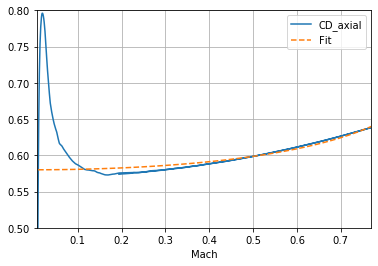

In [14]:
def fit_CD(mach,a,b):
    return a/(np.sqrt(1-mach**2))**b

index = ~(np.isnan(df2['Mach']) | np.isnan(df2['CD_axial']))
popt, pcov = opt.curve_fit(fit_CD, df2['Mach'][index], df2['CD_axial'][index])
print(popt)

df2.plot(x='Mach', y='CD_axial')
plt.plot(machs,fit_CD(machs,*popt),'--',label='Fit')
plt.ylim([0.5,0.8])
plt.grid()
plt.legend()

(0.5, 0.8)

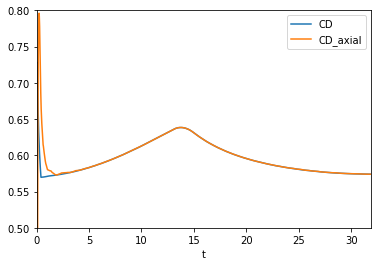

In [15]:
df2.plot(x='t', y=['CD','CD_axial'])
plt.ylim([0.5,0.8])

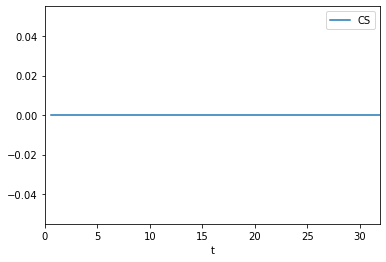

In [16]:
df2.plot(x='t', y='CS')

(0.3, 0.5)

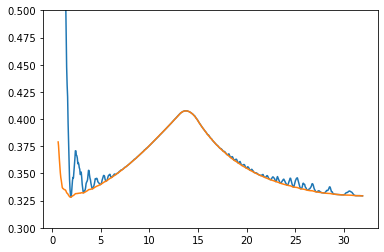

In [17]:
plt.plot(df2['t'],df2['CN']**2 + df2['CD']**2)
plt.plot(df2['t'],df2['CS']**2 + df2['CD_axial']**2)
plt.ylim([0.3,0.5])

[0.0100205  0.19576308]


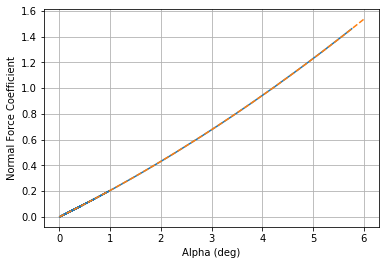

In [18]:
def fit_CN(alpha, a, b):
    return a*alpha**2 + b*alpha

index = ~(np.isnan(df2['alpha']) | np.isnan(df2['CN']))
(popt, pcov) = opt.curve_fit(fit_CN, xdata=df2['alpha'][index], ydata=df2['CN'][index]) 

print(popt)

alpha_range = np.linspace(0,6)

plt.plot(df['alpha'], df['CN'])
plt.plot(alpha_range, fit_CN(alpha_range, *popt), '--')
plt.xlabel('Alpha (deg)')
plt.ylabel('Normal Force Coefficient')

plt.grid()

In [19]:
np.mean(df2.Ref_area)

191.95999999999995

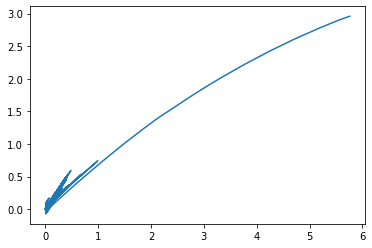

In [20]:

plt.plot(df2['alpha'], df2['CM'])

[0.0100205  0.19576308]


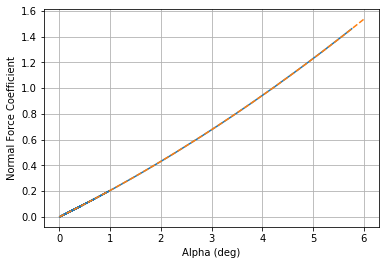

In [21]:
def fit_CS(alpha, a, b):
    return a*alpha**2 + b*alpha

index = ~(np.isnan(df2['alpha']) | np.isnan(df2['CN']))
(popt, pcov) = opt.curve_fit(fit_CN, xdata=df2['alpha'][index], ydata=df2['CN'][index]) 

print(popt)

alpha_range = np.linspace(0,6)

plt.plot(df['alpha'], df['CN'])
plt.plot(alpha_range, fit_CN(alpha_range, *popt), '--')
plt.xlabel('Alpha (deg)')
plt.ylabel('Normal Force Coefficient')

plt.grid()

In [27]:
np.arctan(9/df2['TotalVel'])

0      1.570796
1      1.570796
2      1.562740
3      1.542099
4      1.514628
5      1.486601
6      1.458559
7      1.430447
8      1.402169
9      1.373785
10     1.345351
11     1.316917
12     1.288539
13     1.260277
14     1.232163
15     1.204275
16     1.176640
17     1.149302
18     1.122311
19     1.095704
20     1.069507
21     1.043750
22     1.018470
23     0.993679
24     0.969400
25     0.945676
26     0.922520
27     0.899950
28     0.877969
29     0.856572
         ...   
666    0.139440
667    0.139769
668    0.140091
669    0.140408
670    0.140716
671    0.141020
672    0.141315
673    0.141602
674    0.141884
675    0.142158
676    0.142423
677    0.142684
678    0.142933
679    0.143175
680    0.143411
681    0.143636
682    0.143852
683    0.144063
684    0.144265
685    0.144455
686    0.144640
687    0.144815
688    0.144980
689    0.145138
690    0.145287
691    0.145427
692    0.145557
693    0.145679
694    0.145791
695    0.145895
Name: TotalVel, Length: 

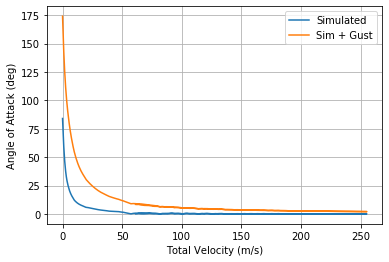

In [31]:
plt.plot(df2['TotalVel'],df2['alpha'], label='Simulated')
plt.plot(df2['TotalVel'], df2['alpha'] + (180/np.pi)*np.arctan(9/df2['TotalVel']), label='Sim + Gust')
plt.grid()
plt.ylabel('Angle of Attack (deg)')
plt.xlabel('Total Velocity (m/s)')
#plt.yscale('log')
vrange = np.linspace(1,250)
plt.legend()



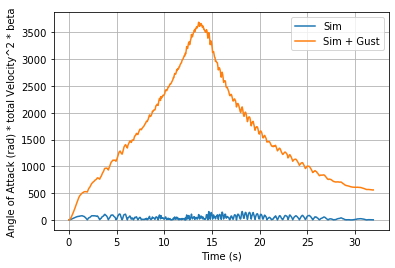

In [36]:
plt.plot(df2['t'],df2['TotalVel']**2*(df2['alpha']*np.pi/180)/np.sqrt(1-df2['Mach']**2), label='Sim')
plt.plot(df2['t'],df2['TotalVel']**2*(df2['alpha']*np.pi/180 + np.arctan(9/df2['TotalVel']))/np.sqrt(1-df2['Mach']**2), label='Sim + Gust')
plt.grid()
plt.ylabel('Angle of Attack (rad) * total Velocity^2 * beta')
plt.xlabel('Time (s)')
plt.legend()




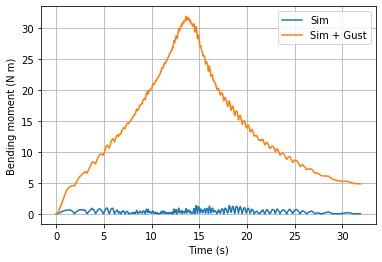

In [38]:
rho=1.225
V = df2['TotalVel']
cr = 0.3
ct = 0.15
b = 0.15
alpha1 = df2['alpha']*np.pi/180
alpha2 = df2['alpha']*np.pi/180 + np.arctan(9/V)
M = df2['Mach']

bending_moment1 = 0.5*rho*V**2*(cr/3 + 2*ct/3)*(np.pi*b**2)*alpha1/np.sqrt(1-M**2)
bending_moment2 = 0.5*rho*V**2*(cr/3 + 2*ct/3)*(np.pi*b**2)*alpha2/np.sqrt(1-M**2)

plt.plot(df2['t'],bending_moment1, label='Sim')
plt.plot(df2['t'],bending_moment2, label='Sim + Gust')
plt.grid()
plt.ylabel('Bending moment (N m)')
plt.xlabel('Time (s)')
plt.legend()





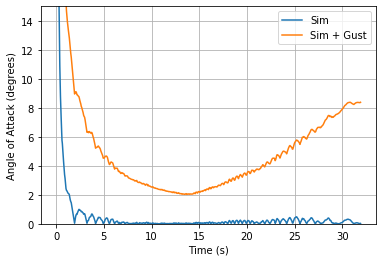

In [45]:
plt.plot(df2['t'], alpha1/(np.pi/180), label='Sim')
plt.plot(df2['t'], alpha2/(np.pi/180), label='Sim + Gust')
plt.ylim([0,15])
plt.grid()
plt.ylabel('Angle of Attack (degrees)')
plt.xlabel('Time (s)')
plt.legend()